In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
%matplotlib inline

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

## data clean

In [2]:
df = Database()
train, test = train_test_split(df, test_size=0.1)
a = train[train.columns[4:]]
X_train = a.mask(a>0, 1)
y_train = train['Family']

b = test[test.columns[4:]]
X_test = b.mask(b>0, 1)
y_test = test['Family']

In [3]:
train.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
735,(2Z)-but-2-ene,Olefins,200.00,NaN,8,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,"2,6-dimethylhept-1-ene",Olefins,NaN,51.0,18,3,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
216,4-isopropyltoluene,Aromatics,320.00,2.0,14,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
198,2-methyl-2-phenylpentadecane,Aromatics,NaN,39.0,38,3,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
512,"methyl (6Z,9E,12Z)-octadeca-6,9,12-trienoate",Esters,335.15,NaN,32,2,10,0,0,0,...,0,1,0,0,1,0,0,0,1,0


## knn

In [4]:
# define knn model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

In [5]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.9568965517241379

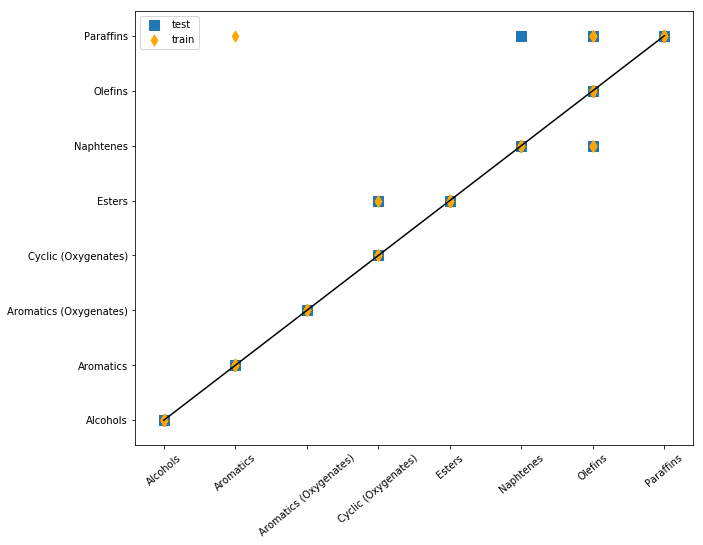

In [14]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.legend()

## svm

In [7]:
# define svm model
svm = LinearSVC(random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
train_pred = svm.predict(X_train)

In [8]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.97413793103448276

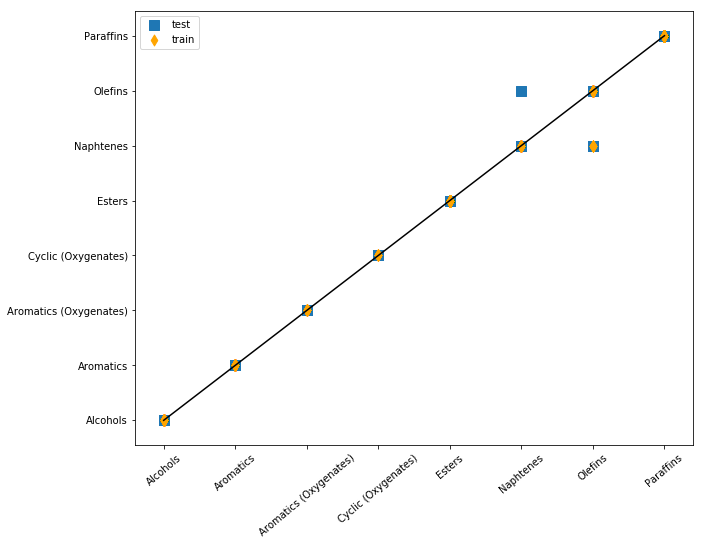

In [9]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.legend()

## lda

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
train_pred = lda.predict(X_train)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [12]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.9568965517241379

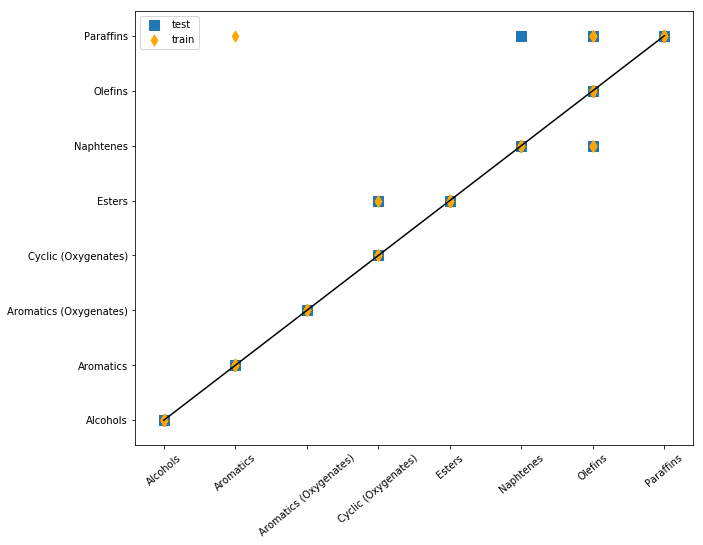

In [13]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.legend()